In [19]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
# matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac
matplotlib.rcParams['font.size'] = 15 # 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용 시, 마이너스 글자가 깨지는 현상을 해결

# 지도_수치 예측 

## SVM(Support Vector Machine)

### Scikit-Learn의 서포트 벡터 머신

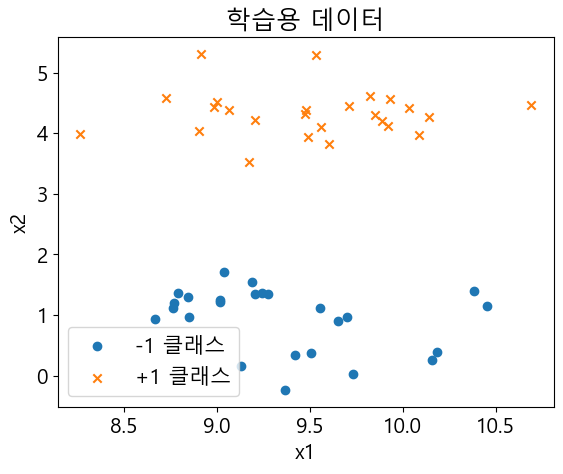

In [20]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, cluster_std=0.5, random_state=4)
y = 2 * y - 1

plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 클래스")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 클래스")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("학습용 데이터")
plt.show()

In [21]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear')
training_points = [[1, 2], [1, 5], [2, 2], [7, 5], [9, 4], [8, 2]]
labels = [1, 1, 1, 0, 0, 0]
classifier.fit(training_points, labels)

SVC(kernel='linear')

In [22]:
print(classifier.predict([[3, 2]]))

[1]


In [23]:
print(classifier.support_vectors_)

[[7. 5.]
 [8. 2.]
 [2. 2.]]


In [26]:
print("학습 데이터 점수: {}".format(classifier.score(training_points , labels )))

학습 데이터 점수: 1.0


## 붓꽃 문제에의 응용


In [27]:
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [28]:
def plot_iris(X, y, model, title, xmin=-2.5, xmax=2.5, ymin=-2.5, ymax=2.5):
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000),
                         np.arange(ymin, ymax, (ymax-ymin)/1000))
    ZZ = np.reshape(model.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
    plt.contourf(XX, YY, ZZ, cmap=mp.cm.Paired_r, alpha=0.5)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='r', marker='^', label='0', s=100)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='g', marker='o', label='1', s=100)
    plt.scatter(X[y == 2, 0], X[y == 2, 1], c='b', marker='s', label='2', s=100)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.xlabel("꽃잎의 길이")
    plt.ylabel("꽃잎의 폭")
    plt.title(title)


model1 = SVC(kernel='linear').fit(X_test_std, y_test)
model2 = SVC(kernel='poly', random_state=0,
             gamma=10, C=1.0).fit(X_test_std, y_test)

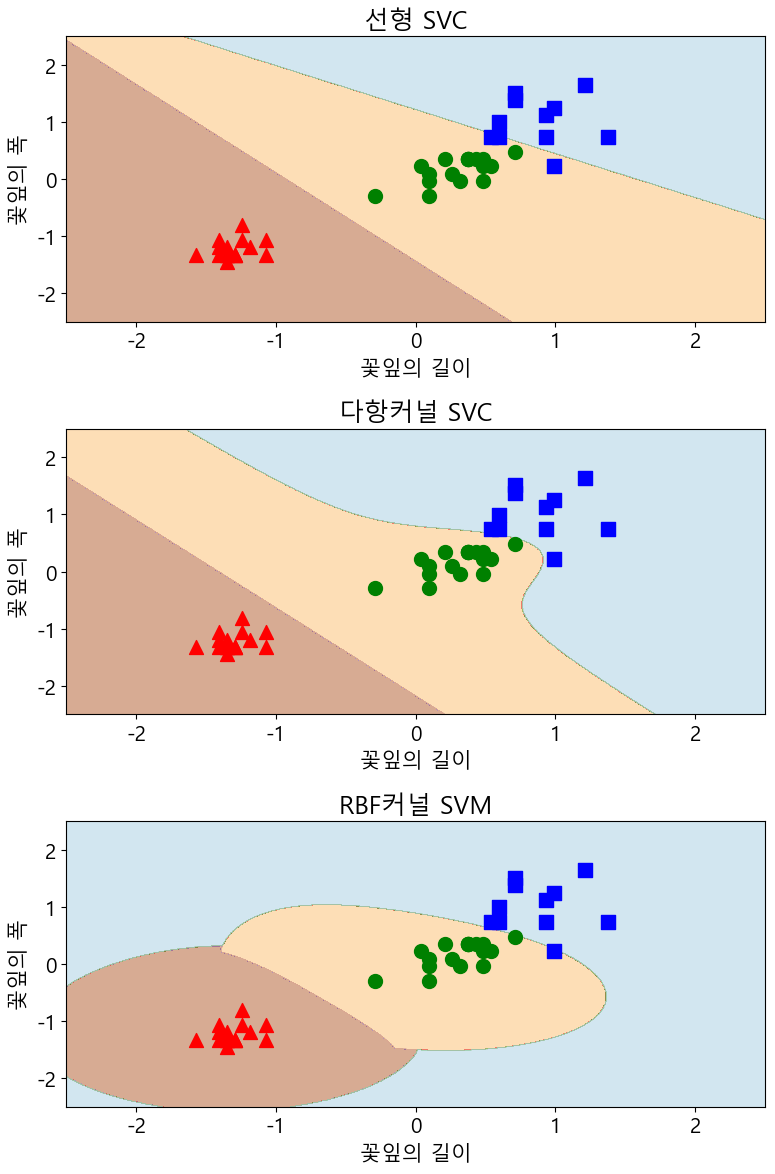

In [29]:
model3 = SVC(kernel='rbf', random_state=0, gamma=1,
             C=1.0).fit(X_test_std, y_test)

plt.figure(figsize=(8, 12))
plt.subplot(311)
plot_iris(X_test_std, y_test, model1, "선형 SVC")
plt.subplot(312)
plot_iris(X_test_std, y_test, model2, "다항커널 SVC")
plt.subplot(313)
plot_iris(X_test_std, y_test, model3, "RBF커널 SVM")
plt.tight_layout()
plt.show()


# 인공 신경망 분석


## 인공신경망을 이용한 데이터분석


In [1]:
# sklearn의 datasets에서 load_iris를 로드
from sklearn.datasets import load_iris
# iris데이터셋을 iris라는 변수에 저장
iris = load_iris()

In [4]:
# iris에 있는 key값을 나타냄
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
# iris의 데이터에 해당하는 부분의 X와 Y의 크기를 나타냄
iris['data'].shape

(150, 4)

In [6]:
# iris데이터셋의 0번째부터 9번째까지를 슬라이싱해서 나타냄
iris['data'][0:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [7]:
# X에는 iris데이터의 값 150x4의 크기를 입력
# y에는 분류하고자 하는 target변수를 입력
# target변수는 데이터가 무엇인지에 대해 판별하는 값
# iris target의 경우 0, 1, 2로 구분됨
X = iris['data']
y = iris['target']

In [8]:
# 위의 데이터를 train과 test로 구분
# sklearn의 model_selection 내에 train_test_split를 로드
# train_test_split를 이용해 위의 X변수에 선언한 data값과 y변수에 선언한 target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [9]:
# sklearn 내에 preprocessing의 StandardScaler를 로드
# StandardScaler는 정규화를 시키는 함수
# StandardScaler는 데이터의 범위를 평균 0, 표준편차 1의 범위로 바꿔주는 함수
# 그리고 StandardScaler를 scaler라는 변수에 저장해 사용
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
# StandardScaler를 담은 변수에 X_train을 학습해 데이터를 정규화
scaler.fit(X_train)

StandardScaler()

In [11]:
# X_train과 X_test를 StandardScaler를 이용해 정규화
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# 다중인공신경망(MLP) 분류 알고리즘을 sklearn의 neural_network에서 로드
from sklearn.neural_network import MLPClassifier

# MLP 알고리즘의 히든레이어를 3계층(10,10,10)으로 할당
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10))

In [13]:
# 위에서 분류한 X_train과 y_train을 MLP를 이용해 학습
mlp.fit(X_train, y_train)

c:\DEV\adspenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10, 10, 10))

In [14]:
# mlp로 학습한 내용을 X_test에 대해 예측하여 predictions변수에 저장
predictions = mlp.predict(X_test)

In [15]:
# sklearn.metrics의 confusion_matrix와 classification_report를 로드
# confusion_matrix는 데이터가 맞는지의 유무를 판단
# classification_report는 precision과 recall 그리고 f1_score등을 계산해 정확률에 대해 계산
from sklearn.metrics import classification_report, confusion_matrix

# confusion_matrix를 이용해 실제값 y_test와 예측값에 대해 비교
print(confusion_matrix(y_test, predictions))

[[10  0  0]
 [ 0 10  0]
 [ 0  3 15]]


In [16]:
# classification_report를 이용해 정확률, 재현율, f1-score를 확인  
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.77      1.00      0.87        10
           2       1.00      0.83      0.91        18

    accuracy                           0.92        38
   macro avg       0.92      0.94      0.93        38
weighted avg       0.94      0.92      0.92        38



# 클러스터링(군집)

## 군집화 성능기준

In [ ]:
import numpy as np

groundtruth = np.array([
    [1, 1, 1, 0, 0],
    [1, 1, 1, 0, 0],
    [1, 1, 1, 0, 0],
    [0, 0, 0, 1, 1],
    [0, 0, 0, 1, 1],
])
groundtruth

In [ ]:
import numpy as np

clustering = np.array([
    [1, 1, 0, 0, 0],
    [1, 1, 0, 0, 0],
    [0, 0, 1, 1, 1],
    [0, 0, 1, 1, 1],
    [0, 0, 1, 1, 1],
])
clustering


In [ ]:
incidence = 1 * (groundtruth == clustering)  # 1*는 True/False를 숫자 0/1로 바꾸기 위한 계산 
incidence

In [ ]:
np.fill_diagonal(incidence, 0) # 대각성분 제외
a_plus_b = np.sum(incidence) / 2 # 대칭행렬이므로 절반만 센다.
a_plus_b

In [ ]:
from scipy.special import comb
rand_index = a_plus_b / comb(incidence.shape[0], 2)
rand_index

## K-Means Clustering

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, _ = make_blobs(n_samples=20, random_state=4)

def plot_KMeans(n):
    model = KMeans(n_clusters=2, init="random", n_init=1, max_iter=n, random_state=6).fit(X)
    c0, c1 = model.cluster_centers_
    plt.scatter(X[model.labels_ == 0, 0], X[model.labels_ == 0, 1], marker='v', facecolor='r', edgecolors='k')
    plt.scatter(X[model.labels_ == 1, 0], X[model.labels_ == 1, 1], marker='^', facecolor='y', edgecolors='k')
    plt.scatter(c0[0], c0[1], marker='v', c="r", s=200)
    plt.scatter(c1[0], c1[1], marker='^', c="y", s=200)
    plt.grid(False)
    plt.title("반복횟수={}, 관성={:5.2f}".format(n, -model.score(X)))

plt.figure(figsize=(8, 8))
plt.subplot(321)
plot_KMeans(1)
plt.subplot(322)
plot_KMeans(2)
plt.subplot(323)
plot_KMeans(3)
plt.subplot(324)
plot_KMeans(4)
plt.tight_layout()
plt.show()

## K-평균++ 알고리즘

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()

model = KMeans(init="k-means++", n_clusters=10, random_state=0)
model.fit(digits.data)
y_pred = model.labels_

def show_digits(images, labels):
    f = plt.figure(figsize=(8, 2))
    i = 0
    while (i < 10 and i < images.shape[0]):
        ax = f.add_subplot(1, 10, i + 1)
        ax.imshow(images[i], cmap=plt.cm.bone)
        ax.grid(False)
        ax.set_title(labels[i])
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.tight_layout()
        i += 1
        
def show_cluster(images, y_pred, cluster_number):
    images = images[y_pred == cluster_number]
    y_pred = y_pred[y_pred == cluster_number]
    show_digits(images, y_pred)
    
for i in range(10):
    show_cluster(digits.images, y_pred, i)

In [4]:
pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------ --------------------------------- 0.2/1.4 MB 6.9 MB/s eta 0:00:01
   --------------- ------------------------ 0.6/1.4 MB 6.1 MB/s eta 0:00:01
   ----------------------- ---------------- 0.8/1.4 MB 6.0 MB/s eta 0:00:01
   --------------------------------- ------ 1.2/1.4 MB 5.4 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 5.7 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 5.7 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 4.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


## Apriori  예

In [5]:
# 패키지 임포트
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
import pandas as pd

# 데이터 셋 생성
dataset=[['사과','치즈','생수'],
['생수','호두','치즈','고등어'],
['수박','사과','생수'],
['생수','호두','치즈','옥수수']]

dataset

[['사과', '치즈', '생수'],
 ['생수', '호두', '치즈', '고등어'],
 ['수박', '사과', '생수'],
 ['생수', '호두', '치즈', '옥수수']]

In [6]:
te=TransactionEncoder()
te_ary=te.fit(dataset).transform(dataset)
df=pd.DataFrame(te_ary, columns=te.columns_)

df

,고등어,사과,생수,수박,옥수수,치즈,호두
0,False,True,True,False,False,True,False
1,True,False,True,False,False,True,True
2,False,True,True,True,False,False,False
3,False,False,True,False,True,True,True


In [7]:
frequent_itemsets=apriori(df, min_support=0.5, use_colnames=True)

frequent_itemsets

,support,itemsets
0,0.50,(사과)
1,1.00,(생수)
2,0.75,(치즈)
3,0.50,(호두)
4,0.50,"(생수, 사과)"
5,0.75,"(치즈, 생수)"
6,0.50,"(호두, 생수)"
7,0.50,"(치즈, 호두)"
8,0.50,"(치즈, 호두, 생수)"


In [8]:
from mlxtend.frequent_patterns import association_rules

association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(생수),(사과),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0,0.0
1,(사과),(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf,0.0
2,(치즈),(생수),0.75,1.00,0.75,1.000000,1.000000,0.000,inf,0.0
3,(생수),(치즈),1.00,0.75,0.75,0.750000,1.000000,0.000,1.0,0.0
4,(호두),(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf,0.0
5,(생수),(호두),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0,0.0
6,(치즈),(호두),0.75,0.50,0.50,0.666667,1.333333,0.125,1.5,1.0
7,(호두),(치즈),0.50,0.75,0.50,1.000000,1.333333,0.125,inf,0.5
8,"(치즈, 호두)",(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf,0.0
9,"(치즈, 생수)",(호두),0.75,0.50,0.50,0.666667,1.333333,0.125,1.5,1.0


## FP-Growth

In [11]:
pip install mlxtend --upgrade

Note: you may need to restart the kernel to use updated packages.


In [17]:
from sklearn.preprocessing import MultiLabelBinarizer

data = [
    ['휴지', '물티슈', '샴푸'],
    ['수세미', '물티슈', '비누'],
    ['휴지', '수세미', '물티슈', '비누'],
    ['수세미', '비누']
]

mlb = MultiLabelBinarizer()
encoded_data = mlb.fit_transform(data)
df_encoded = pd.DataFrame(encoded_data, columns=mlb.classes_)

print(df_encoded)

   물티슈  비누  샴푸  수세미  휴지
0    1   0   1    0   1
1    1   1   0    1   0
2    1   1   0    1   1
3    0   1   0    1   0


In [18]:
from mlxtend.frequent_patterns import fpgrowth
fpgrowth(df_encoded, min_support=0.5, use_colnames=True)

c:\DEV\adspenv\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.75,(물티슈)
1,0.50,(휴지)
2,0.75,(수세미)
3,0.75,(비누)
4,0.50,"(비누, 물티슈)"
5,0.50,"(물티슈, 수세미)"
6,0.50,"(비누, 물티슈, 수세미)"
7,0.50,"(휴지, 물티슈)"
8,0.75,"(비누, 수세미)"
